🔍 Dataset Overview
Total questions: 5046
Top-1 Average Accuracy: 0.465
Top-5 Average Accuracy: 0.722
Top-1 Perfect: 2348
Top-5 Perfect: 3642

📚 Top-1 Accuracy by Category:
question_category
Weather and Climate               0.620155
Geography/History/Culture         0.546099
Brands, Companies and Products    0.500000
Other                             0.491115
Objects, Material and Clothing    0.488318
Cooking and Food                  0.467081
People and Everyday Life          0.455607
Plants and Animals                0.450000
Sports and Recreation             0.440917
Science and Technology            0.428571
Vehicles and Transportation       0.428044
Name: vqa_accuracy_top1, dtype: float64

📚 Top-5 Accuracy by Category:
question_category
Weather and Climate               0.837209
Geography/History/Culture         0.794326
Cooking and Food                  0.767702
Brands, Companies and Products    0.750000
Objects, Material and Clothing    0.750000
Other                            

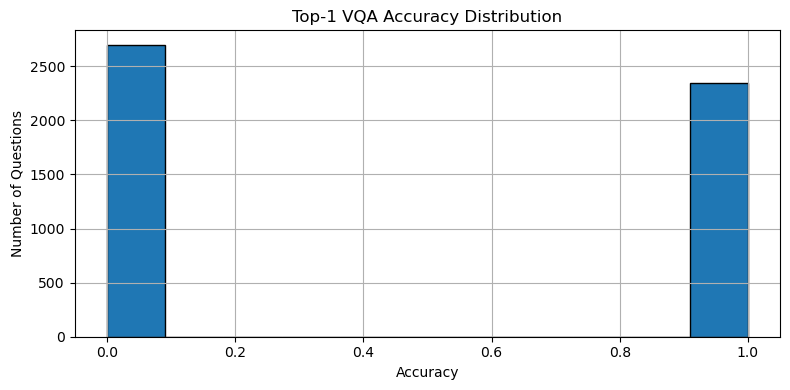

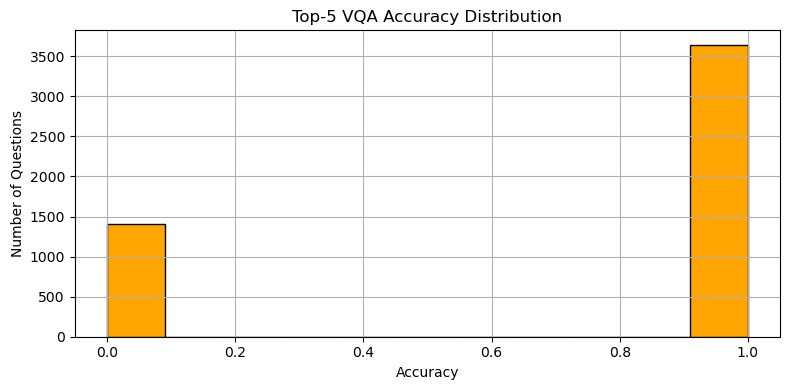

C:\Users\karol\AppData\Local\Temp\ipykernel_32304\3535372281.py:71: UserWarning: You passed a edgecolor/edgecolors ('red') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(df["question_len"], df["vqa_accuracy_top5"], alpha=0.4, edgecolors="red", label="Top-5", marker='x')


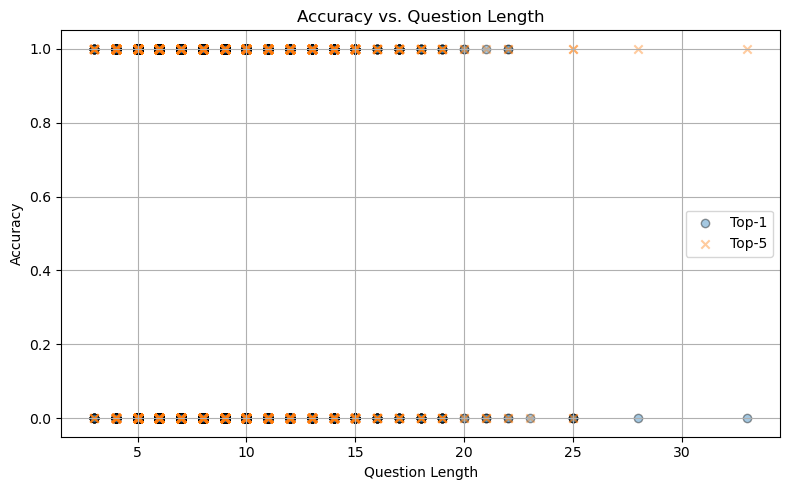

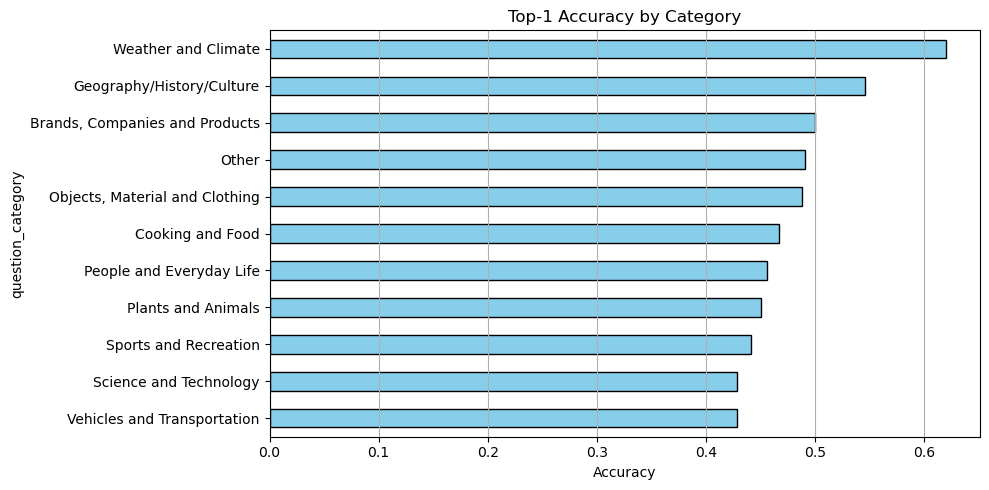

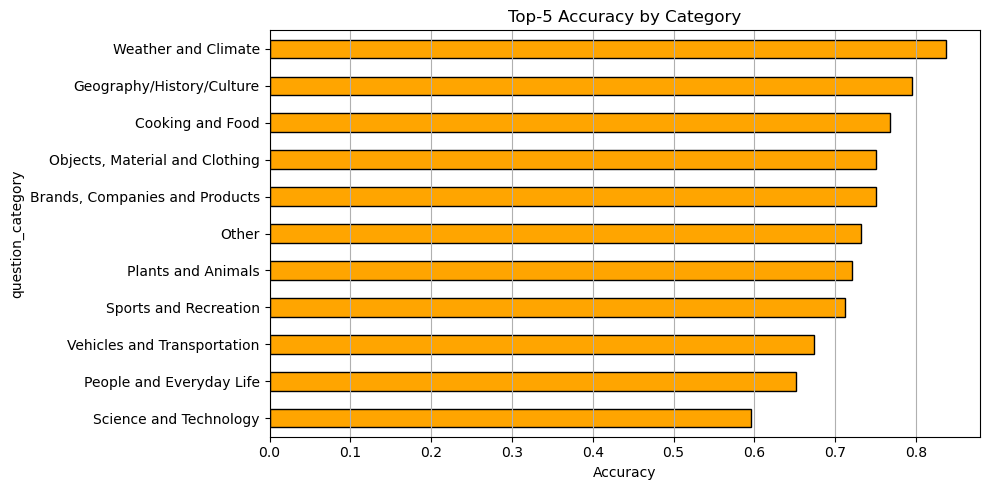

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

# === Load evaluated results ===
df = pd.read_csv("blip_val2014_results.csv")  # Update filename if different

# === Add question length ===
df["question_len"] = df["question"].str.split().apply(len)

# === Map question type to category ===
category_map = {
    "one": "Vehicles and Transportation",
    "two": "Brands, Companies and Products",
    "three": "Objects, Material and Clothing",
    "four": "Sports and Recreation",
    "five": "Cooking and Food",
    "six": "Geography/History/Culture",
    "seven": "People and Everyday Life",
    "eight": "Plants and Animals",
    "nine": "Science and Technology",
    "ten": "Weather and Climate",
    "other": "Other",
    "unknown": "Unknown"
}
df["question_category"] = df["question_type"].map(category_map).fillna("Unknown")

# === Summary Statistics ===
print("🔍 Dataset Overview")
print(f"Total questions: {len(df)}")
print(f"Top-1 Average Accuracy: {df['vqa_accuracy_top1'].mean():.3f}")
print(f"Top-5 Average Accuracy: {df['vqa_accuracy_top5'].mean():.3f}")
print(f"Top-1 Perfect: {(df['vqa_accuracy_top1'] == 1.0).sum()}")
print(f"Top-5 Perfect: {(df['vqa_accuracy_top5'] == 1.0).sum()}")

# === Accuracy by Category ===
print("\n📚 Top-1 Accuracy by Category:")
print(df.groupby("question_category")["vqa_accuracy_top1"].mean().sort_values(ascending=False))

print("\n📚 Top-5 Accuracy by Category:")
print(df.groupby("question_category")["vqa_accuracy_top5"].mean().sort_values(ascending=False))

# === Accuracy by Question Type ===
print("\n📑 Top-1 Accuracy by Question Type:")
print(df.groupby("question_type")["vqa_accuracy_top1"].mean().sort_values(ascending=False))

print("\n📑 Top-5 Accuracy by Question Type:")
print(df.groupby("question_type")["vqa_accuracy_top5"].mean().sort_values(ascending=False))

# === Accuracy Distribution Plots ===
plt.figure(figsize=(8, 4))
df["vqa_accuracy_top1"].hist(bins=11, edgecolor="black")
plt.title("Top-1 VQA Accuracy Distribution")
plt.xlabel("Accuracy")
plt.ylabel("Number of Questions")
plt.grid(True)
plt.tight_layout()
plt.show()

plt.figure(figsize=(8, 4))
df["vqa_accuracy_top5"].hist(bins=11, edgecolor="black", color="orange")
plt.title("Top-5 VQA Accuracy Distribution")
plt.xlabel("Accuracy")
plt.ylabel("Number of Questions")
plt.grid(True)
plt.tight_layout()
plt.show()

# === Accuracy vs Question Length ===
plt.figure(figsize=(8, 5))
plt.scatter(df["question_len"], df["vqa_accuracy_top1"], alpha=0.4, edgecolors="k", label="Top-1")
plt.scatter(df["question_len"], df["vqa_accuracy_top5"], alpha=0.4, edgecolors="red", label="Top-5", marker='x')
plt.title("Accuracy vs. Question Length")
plt.xlabel("Question Length")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# === Bar Charts by Category ===
plt.figure(figsize=(10, 5))
df.groupby("question_category")["vqa_accuracy_top1"].mean().sort_values().plot(kind="barh", color="skyblue", edgecolor="black")
plt.title("Top-1 Accuracy by Category")
plt.xlabel("Accuracy")
plt.grid(True, axis="x")
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 5))
df.groupby("question_category")["vqa_accuracy_top5"].mean().sort_values().plot(kind="barh", color="orange", edgecolor="black")
plt.title("Top-5 Accuracy by Category")
plt.xlabel("Accuracy")
plt.grid(True, axis="x")
plt.tight_layout()
plt.show()
